In [1]:
import numpy as np
from  sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt
t = np.loadtxt("eucalyptus.txt")
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split


# 1 La régression linéaire par moindres carrés sous sklearn


## 1.1 Etude d’un régresseur linéaire simple

Erreur quadratique moyenne =  15.221774193548393


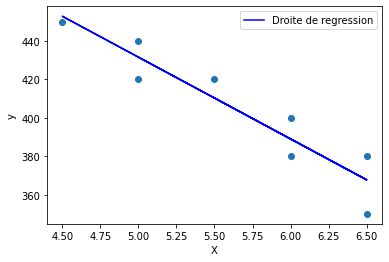

In [2]:
x = np.array([5.5,6.0, 6.5, 6.0, 5.0, 6.5, 4.5, 5]).reshape(-1,1)
y= np.array([420, 380, 350, 400, 440, 380, 450, 420])
ln = LinearRegression().fit(x,y)
droite_de_regression = ln.predict(x)
print("Erreur quadratique moyenne = ",mean_squared_error(y,ln.predict(x))/len(y))
plt.scatter(x, y)
plt.plot(x, ln.predict(x), label='Droite de regression', color='blue')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()

L'attribut <b>coef_</b> représente le coefficient directeur de la droite de regression.
L'attribut <b>intercept_</b> représente l'ordonné à l'origine de la droite de regression.

Score =  0.8782258064516129  le score désigne les bons y prédit par le regresseur, le score est plutot bon


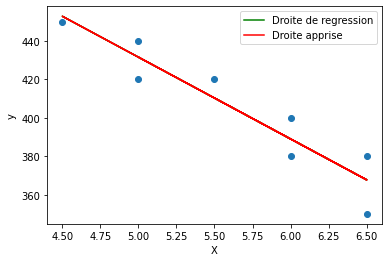

In [3]:
print("Score = ",ln.score(x,y), " le score désigne les bons y prédit par le regresseur, le score est plutot bon")
w0 = ln.intercept_
w1 = ln.coef_[0]
plt.scatter(x, y)
plt.plot(x, droite_de_regression, label='Droite de regression', color='green')
plt.plot(x, w1*x+w0, label='Droite apprise', color='red')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()

coef =  70.27237354085604
intercept =  0.0


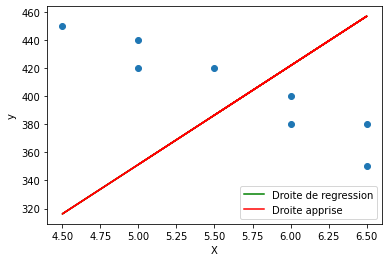

In [4]:
ln_false = LinearRegression(fit_intercept=False).fit(x,y)
droite_de_regression_f = ln_false.predict(x)
print ("coef = ", ln_false.coef_[0])
print ("intercept = ", ln_false.intercept_)
w1_f=ln_false.coef_[0]
w0_f=ln_false.intercept_
plt.scatter(x, y)
plt.plot(x, droite_de_regression_f, label='Droite de regression', color='green')
plt.plot(x, w1_f*x+w0_f, label='Droite apprise', color='red')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()



On remarque que les droites n'ont rien avoir avec les points, c'est du au faite qu'avec le fit interception à Faux. Elles sont obligées d'avoir 0 comme ordonée à l'origine.

## 1.2 Jeu de données Eucalyptus


Text(0, 0.5, 'hauteur')

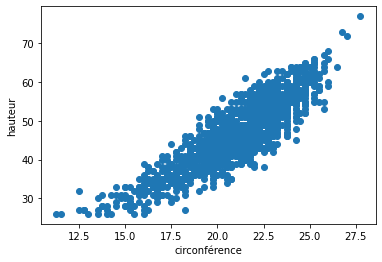

In [5]:
c = t[:,0].reshape(-1,1)
h = t[:,1]

plt.scatter(c, h)
plt.xlabel("circonférence")
plt.ylabel("hauteur")


Une corélation linéaire semble présente

Score =  0.7683202384330652
Valeur de hauteur pour 22.8 =  52.09153807408181


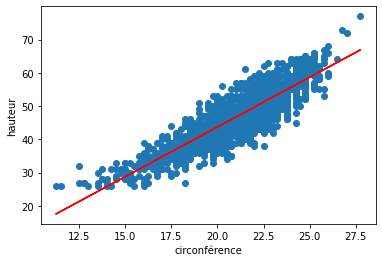

In [6]:
ln_2 = LinearRegression().fit(c,h)
droite_de_regression_2 = ln_2.predict(c)
w1_2=ln_2.coef_[0]
w0_2=ln_2.intercept_
plt.scatter(c, h)
plt.plot(c,droite_de_regression_2, color='red')
plt.ylabel("hauteur")
plt.xlabel("circonférence")
print("Score = ",ln_2.score(c,h))
print("Valeur de hauteur pour 22.8 = ", w1_2*22.8+w0_2)

w0 :  117.0466319383026  w1 :  9.680736229720333  w2 :  -59.82940739491454
MSE :  16.05912111886697
On obtient un meilleur résultat (Score = 0.7770349809093087 ), c'est donc un meilleur modèle.


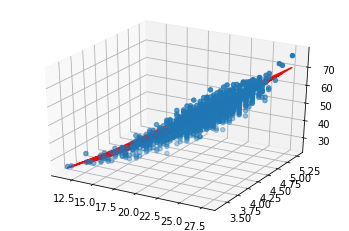

In [7]:
sqrt_c = np.zeros(len(c))
for i in range (len(c)) :
    sqrt_c [i] = sqrt(c[i])
new_c =  np.c_[c,sqrt_c]
ln_3 = LinearRegression().fit(new_c,h)
droite_de_regression_3 = ln_3.predict(new_c)
w1_3=ln_3.coef_
w0_3=ln_3.intercept_
print("w0 : ",w0_3," w1 : ",w1_3[0]," w2 : ",w1_3[1])
print("MSE : ",mean_squared_error(h,droite_de_regression_3))
print("On obtient un meilleur résultat (Score =",ln_3.score(new_c,h),"), c'est donc un meilleur modèle.")
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(new_c[:,0],new_c[:,1],h)
ax.plot(new_c[:,0],new_c[:,1],droite_de_regression_3,color='red')


In [8]:
pow_c = np.zeros(len(c))
for i in range (len(c)) :
    pow_c [i] = pow(c[i],2)
neo_c =  np.c_[new_c,pow_c]
ln_4 = LinearRegression().fit(neo_c,h)
droite_de_regression_4 = ln_4.predict(neo_c)
w1_4=ln_4.coef_
w0_4=ln_4.intercept_
print("w0 : ",w0_4," w1 : ",w1_4[0]," w2 : ",w1_4[1]," w3 : ", w1_4[2])
print("MSE : ",mean_squared_error(h,droite_de_regression_4))
print("On obtient un meilleur résultat (Score =",ln_4.score(neo_c,h),"), c'est donc un meilleur modèle.")


w0 :  74.47562580195407  w1 :  5.180509311129531  w2 :  -33.658139610314926  w3 :  0.03883664853944424
MSE :  16.057692353299384
On obtient un meilleur résultat (Score = 0.7770548179065948 ), c'est donc un meilleur modèle.


Selon le score obtenu, le meilleur modèle est le dernier

In [9]:
def regression_lineaire (S) :
    X = np.zeros([len(S[:,0]),len(S[0,:])-1])
    y = np.zeros([len(S[:,0]),1])
    for i in range (len(S[:,0])) :
        for j in range (len(S[0,:])-1) :
            X[i,j] = S[i,j]
        y[i] = S[i,len(S[0,:])-1]
    X= np.c_[np.ones(len(S[:,0])),X]
    return np.dot(np.linalg.inv(np.dot(np.transpose(X),X)),np.dot(np.transpose(X),y))

S  = np.array([[5.5,420],[6.0,380], [6.5,350], [6.0,400], [5.0,440], [6.5,380], [4.5,450], [5,420]])
w=regression_lineaire(S)
print("Pour les données jouet de la section 1.1\nResultat attendu : ",w0,w1,"Resultat obtenu :",w[0,0],w[1,0],"\nOn peut voir que les résultats sont égaux")

Pour les données jouet de la section 1.1
Resultat attendu :  644.516129032258 -42.58064516129033 Resultat obtenu : 644.5161290322576 -42.580645161289794 
On peut voir que les résultats sont égaux


In [14]:
w_2=regression_lineaire(t)
print("Pour les données x données Eucalyptus initiales\nResultat attendu : ",w1_2,w0_2,"\nResultat obtenu :",w_2[0,0],w_2[1,0],"\nOn peut voir que les résultats sont égaux")

Pour les données x données Eucalyptus initiales
Resultat attendu :  2.9879701625877817 -16.034181632919612 
Resultat obtenu : -16.03418163291917 2.9879701625878 
On peut voir que les résultats sont égaux
